
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [96]:
#No pude usar esta forma porque me daba este error:
   #ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 6

# my_cols = pd.read_csv('../data/heart_disease/columns.csv').column.values.tolist()

# my_data = pd.read_csv('../data/heart_disease/processed.cleveland.data',
#                        delimiter=',',
#                        header=0,
#                        names = my_cols
#                     )

#Bajé el dataset nuevamente en formato .csv de un solo archivo para trabajarlo.
my_data = pd.read_csv('../data/heart_disease/dataset.csv')

my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

# Preprocessing

## Missing

In [97]:
my_data.isna().sum()

#No hay valores faltantes en el dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# One hot encoding

In [ ]:
#my_data.describe(include='O')

#No hay variables categóricas en el dataset


## Standardize

In [99]:
x = my_data[[col for col in my_data.columns if col != 'target']]
y = my_data['target']

### Train test split

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=12,
                                             )

In [101]:
std = StandardScaler()

In [102]:
columnas = [col for col in my_data.columns if ((col != 'target'))]
print(columnas)

xtrain[columnas] = std.fit_transform(xtrain[columnas])
xtest[columnas] = std.transform(xtest[columnas])

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [103]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,-0.977717,0.695457,-0.934460,0.577754,1.246429,-0.405096,-1.035714,-0.149019,1.545335,-0.841074,-0.735455,2.296375,1.150335
250,-0.322055,0.695457,-0.934460,0.466609,1.025805,-0.405096,0.845143,-1.275096,1.545335,2.840654,-0.735455,2.296375,1.150335
38,1.207825,-1.437904,1.020585,1.300190,0.444162,-0.405096,0.845143,-0.103976,-0.647109,-0.139793,0.950891,-0.699471,-0.481703
24,-1.524102,0.695457,1.998108,0.466609,-0.959804,-0.405096,0.845143,1.247316,1.545335,0.386168,0.950891,-0.699471,1.150335
247,1.317102,0.695457,0.043063,1.578051,-0.017141,-0.405096,0.845143,-1.365183,1.545335,-0.841074,-0.735455,2.296375,-2.113741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-1.742657,0.695457,1.998108,-0.644832,-0.317991,-0.405096,0.845143,1.427489,1.545335,2.490013,-0.735455,-0.699471,1.150335
130,0.005777,-1.437904,1.020585,1.578051,-0.919691,-0.405096,0.845143,0.571670,-0.647109,-0.841074,0.950891,0.299145,-0.481703
241,0.552162,-1.437904,-0.934460,2.356060,0.043029,-0.405096,0.845143,-0.329192,1.545335,-0.841074,-0.735455,-0.699471,-0.481703
253,1.426379,0.695457,-0.934460,-1.756273,1.045862,-0.405096,-1.035714,-1.139967,1.545335,-0.052133,-0.735455,1.297760,-0.481703


In [104]:
print(xtrain[columnas].shape);
print(ytrain.shape);

print(xtest[columnas].shape);
print(ytest.shape);

(227, 13)
(227,)
(76, 13)
(76,)


### APLICAMOS PCA

In [117]:
RANDOM_STATE = 17

pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(xtrain[columnas])
X_pca = pca.transform(xtrain[columnas])
X_pca.shape

(227, 11)

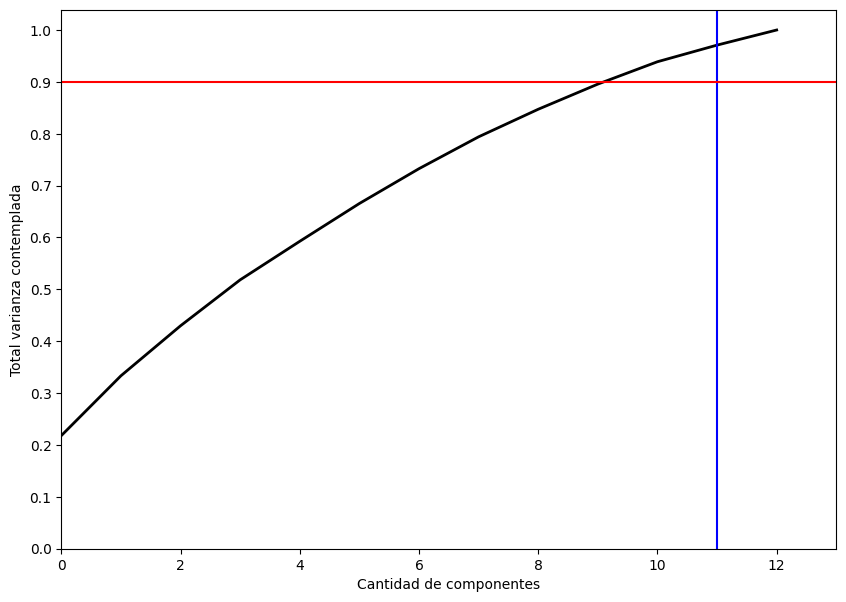

In [106]:
#CURVA DE VARIANZA EXPLICADA
#Graficamos las 13 componentes
pca_2 = PCA(n_components=13, random_state=RANDOM_STATE).fit(xtrain[columnas])

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 13)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(11, c='b') #Marcamos la linea de las 11 componentes
plt.axhline(0.9, c='r') #Marcamos la linea del 90% de la varianza
plt.show();

#### Segun en analisis con PCA, vemos que todas las características del dataset tienen un peso similar, ya que si las ordenamos por su varianza no hay un grupo de pocas caracteristicas que sumen el 80% o 90% de la varianza. Solo podríamos eliminar una dimension para quedarnos con el 90%. Por este motivo se decide no aplicar PCA, ya que no nos brinda ninguna mejora.

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

## LogisticRegressionCV

In [150]:
logr = LogisticRegressionCV(cv=10, scoring='roc_auc', n_jobs=-1, penalty="l2")

logr.fit(xtrain[columnas],ytrain)

# Predecir las probabilidades de la clase positiva
logr_y_hat = (logr.predict_proba(xtest[columnas])[:, 1] > 0.5).astype(int)

print(f'Iteraciones para LogisticRegressionCV: {logr.n_iter_.sum()}')

Iteraciones para LogisticRegressionCV: 742


# SGDClassifier

In [148]:
sgd_clf = SGDClassifier(loss='log_loss', random_state=0, penalty="l1") #Prueba con log_loss que me permite predecir probabilidades

sgd_clf.fit(xtrain[columnas], ytrain)

# Predecir las probabilidades de la clase positiva
sgd_y_hat = (sgd_clf.predict_proba(xtest[columnas])[:, 1] > 0.5).astype(int)


print(f'Iteraciones para SGDClassifier: {sgd_clf.n_iter_}')


Iteraciones para SGDClassifier: 55


In [109]:
# # COMPARAMOS AMBAS

# # Graficar la curva ROC
# fpr, tpr, thresholds = roc_curve(ytest, logr_y_hat)
# plt.plot(fpr, tpr)
# plt.xlabel('Tasa de falsos positivos')
# plt.ylabel('Tasa de verdaderos positivos')
# plt.title('Curva ROC')
# plt.show()

# # Graficar la curva ROC
# fpr, tpr, thresholds = roc_curve(ytest, sgd_y_hat)
# plt.plot(fpr, tpr)
# plt.xlabel('Tasa de falsos positivos')
# plt.ylabel('Tasa de verdaderos positivos')
# plt.title('Curva ROC')
# plt.show()

# # Matriz de confusión
# logr_y_hat = logr.predict(xtest[columnas])
# cm = confusion_matrix(ytest, logr_y_hat)
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicción')
# plt.ylabel('Verdad')
# plt.title('Matriz de confusión')
# plt.show()

# # Matriz de confusión
# sgd_y_hat = sgd_clf.predict(xtest[columnas])
# cm = confusion_matrix(ytest, sgd_y_hat)
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicción')
# plt.ylabel('Verdad')
# plt.title('Matriz de confusión')
# plt.show()

# # Curva de precisión-recall
# precision, recall, thresholds = precision_recall_curve(ytest, logr_y_hat)
# plt.plot(recall, precision)
# plt.xlabel('Recall')
# plt.ylabel('Precisión')
# plt.title('Curva de precisión-recall')
# plt.show()

# # Curva de precisión-recall
# precision, recall, thresholds = precision_recall_curve(ytest, sgd_y_hat)
# plt.plot(recall, precision)
# plt.xlabel('Recall')
# plt.ylabel('Precisión')
# plt.title('Curva de precisión-recall')
# plt.show()



# # Histograma de probabilidades
# sns.histplot(logr_y_hat[ytest == 0], color='blue', label='Clase 0', kde=True)
# sns.histplot(logr_y_hat[ytest == 1], color='orange', label='Clase 1', kde=True)
# plt.xlabel('Probabilidad')
# plt.ylabel('Frecuencia')
# plt.title('Histograma de probabilidades')
# plt.legend()
# plt.show()

# # Histograma de probabilidades
# sns.histplot(sgd_y_hat[ytest == 0], color='blue', label='Clase 0', kde=True)
# sns.histplot(sgd_y_hat[ytest == 1], color='orange', label='Clase 1', kde=True)
# plt.xlabel('Probabilidad')
# plt.ylabel('Frecuencia')
# plt.title('Histograma de probabilidades')
# plt.legend()
# plt.show()

# sns.histplot(data = logr_y_hat)

# sns.histplot(data = sgd_y_hat)



## COMPARACIÓN DE MODELOS

### LogisticRegression

In [151]:
print(classification_report(ytest, logr_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        39
           1       0.55      1.00      0.71        37

    accuracy                           0.61        76
   macro avg       0.78      0.62      0.54        76
weighted avg       0.78      0.61      0.54        76



### SGDClasiffier

In [143]:
print(classification_report(ytest, sgd_y_hat))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        39
           1       0.74      0.84      0.78        37

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



### Comparativa según el classification_report

<br>PRECISION (TP / (TP + FP))
<br>Vemos que LogisticRegression tiene poca presición, solo 55%, para predecir la clase 1, mientras que el SGDClassifier tiene entre 74% y 82% para predecir ambas clases.

<br>RECALL (TP / (TP + FN))
<br>Ocurre algo similar que en PRESICION, LogisticRegression tiene un porcentaje muy bajo, solo 23%, para la clase 1, mientras que el SGDClassifier tiene un entre 72% y 84% para ambas clases.

<br>F1-SCORE (Medida de equilibrio entre PRESICION y RECALL =  2 * (precision * recall) / (precision + recall)
<br>En esta metrica vemos que SGDClassifier tiene un 77-78% en ambas clases y tambien supera a LogisticRegression con un 38% y 71% para la clase 0 y 1 respectivamente.

<br>ACCURACY ((TP + TN) / (TP + TN + FP + FN))
<br>El modelo SGDClassifier tiene una exactitud del 78%, mientras que el modelo de LogisticRegression tiene una exactitud del 61%




### Como conclusión, vemos que el modelo SGDClassifier tiene mejor rendimiento que el modelo LogisticRegression, ya que tiene mejores resultados en todas las metricas del classification_report y tuvo una menor cantidad de iteraciones para entrenar al modelo.


### Tambien se pudo observar que utilizando una penalidad L1 (Lasso) en el SGDClassifier, se mejoró aún más el rendimiento del modelo. Lasso realiza una selección de los atributos de entrada, anulando algunos de éstos, para obtener un modelo que generalice mejor. Esto nos indica que las características del dataset no estan muy correlacionadas entre si.